In [157]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
import src.mnist

In [159]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn import svm

In [160]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

dtype: <class 'numpy.float64'>
dtype: <class 'numpy.float64'>


In [161]:
pca1 = PCA(n_components=2)
pca1.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [162]:
pca1_train_images = pca1.transform(train_set.images)
pca1_test_images = pca1.transform(test_set.images)

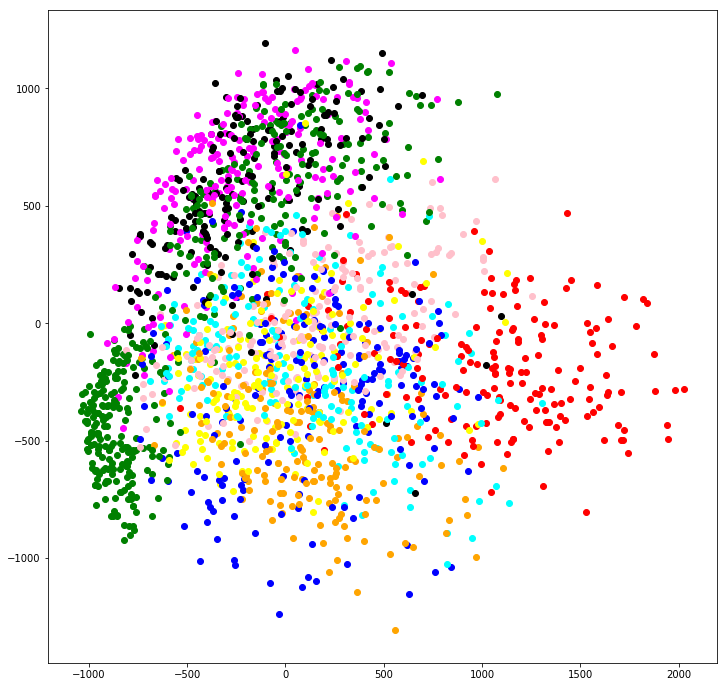

In [163]:
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, 2000):
    plt.scatter(pca1_train_images[i][0], pca1_train_images[i][1], color=color_values[train_set.labels[i]])

plt.show()   

In [164]:
selected_labels = [0, 1, 7]

n_attempted = 200

n_selected = 0
for i in range(0, n_attempted):
    if train_set.labels[i] in selected_labels:
        n_selected += 1

selected_pca1_train_images = np.zeros((n_selected, 2))
selected_train_labels = []
k = 0
for i in range(0, n_attempted):
    if train_set.labels[i] in selected_labels:
        selected_pca1_train_images[k, :] = pca1_train_images[i]
        selected_train_labels.append(selected_labels.index(train_set.labels[i]))
        k += 1

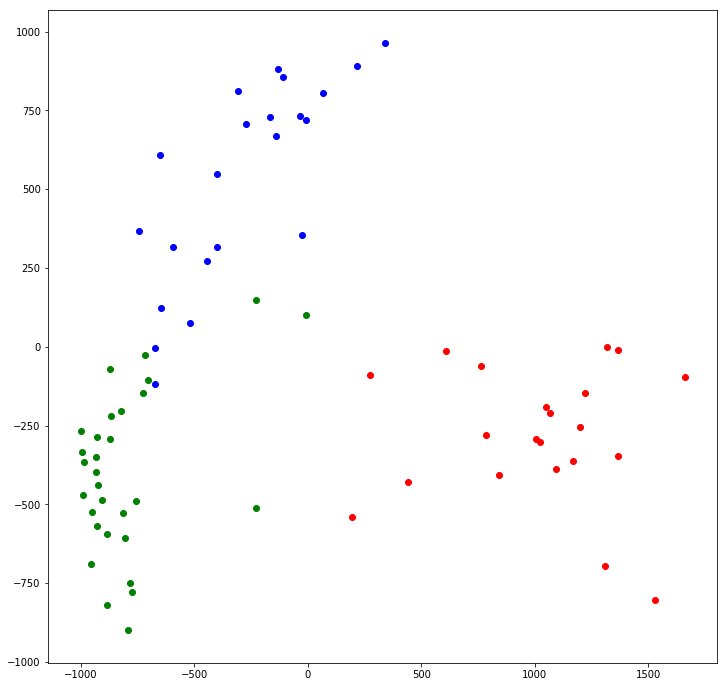

In [165]:
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, n_selected):
    plt.scatter(selected_pca1_train_images[i][0],
                selected_pca1_train_images[i][1],
                color=color_values[selected_train_labels[i]])

plt.show()    

In [166]:
def plot_svm(clf, X, Y):
    
    h = 10.0  # step size in the mesh
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    print(Z)
    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    
    for i in range(0, X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=color_values[Y[i]], cmap=plt.cm.coolwarm)
        
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

In [167]:
clf1 = svm.SVC(kernel='linear', C=1.0)
clf1 = clf1.fit(selected_pca1_train_images, selected_train_labels)

[1 1 1 ..., 0 0 0]


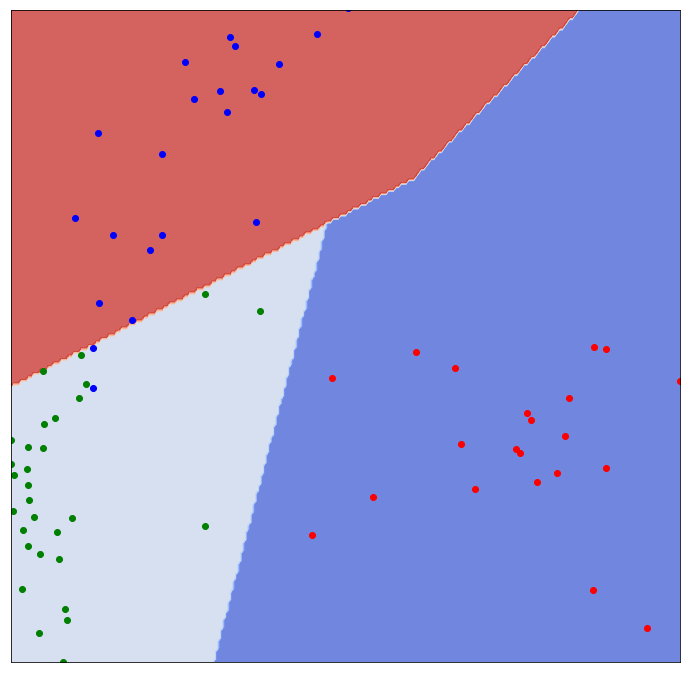

In [168]:
plot_svm(clf1, selected_pca1_train_images, selected_train_labels)

In [169]:
clf2 = svm.SVC(kernel='poly', degree=3, C=1.0, tol=0.1, max_iter=1e9, verbose=True)
clf2.fit(selected_pca1_train_images, selected_train_labels)

[LibSVM]

/home/james/.pyenv/versions/3.5.0/envs/mnist/lib/python3.5/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=1000000000.0, probability=False, random_state=None,
  shrinking=True, tol=0.1, verbose=True)

[1 1 1 ..., 0 0 0]


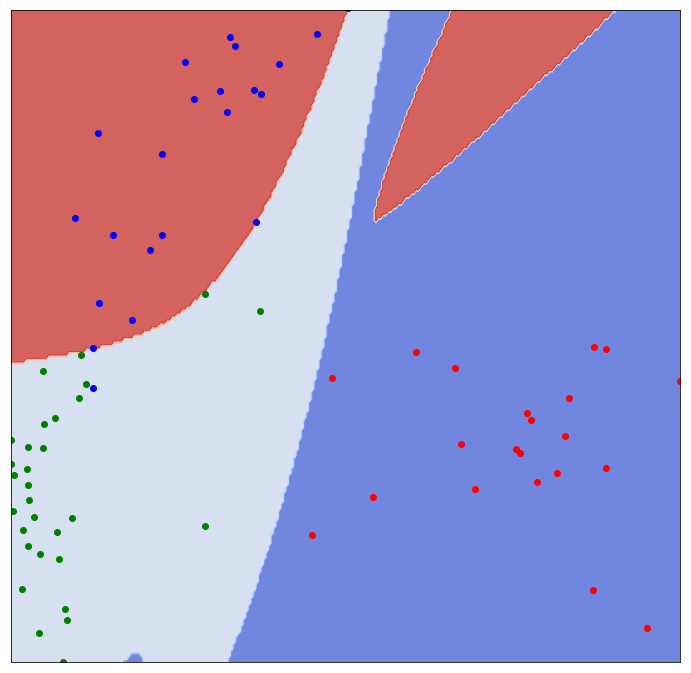

In [170]:
plot_svm(clf2, selected_pca1_train_images, selected_train_labels)

In [171]:
clf3 = svm.SVC(kernel='rbf', C=1.0, tol=0.001, gamma=0.00001, max_iter=1e9, verbose=True)
clf3.fit(selected_pca1_train_images, selected_train_labels)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=1000000000.0, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True)

[1 1 1 ..., 0 0 0]


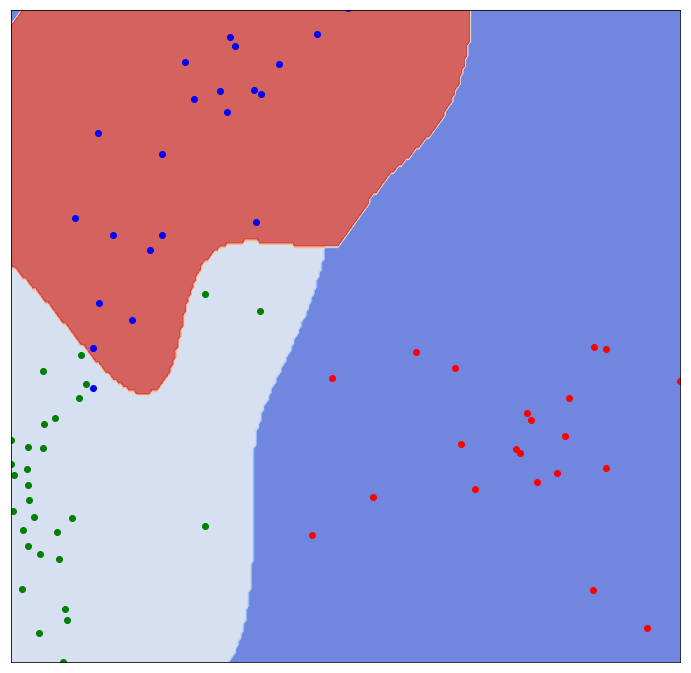

In [172]:
plot_svm(clf3, selected_pca1_train_images, selected_train_labels)

In [173]:
selected_labels = [0, 1, 7]

n_attempted = 2000

n_selected = 0
for i in range(0, n_attempted):
    if train_set.labels[i] in selected_labels:
        n_selected += 1

selected_pca1_train_images = np.zeros((n_selected, 2))
selected_train_labels = []
k = 0
for i in range(0, n_attempted):
    if train_set.labels[i] in selected_labels:
        selected_pca1_train_images[k, :] = pca1_train_images[i]
        selected_train_labels.append(selected_labels.index(train_set.labels[i]))
        k += 1

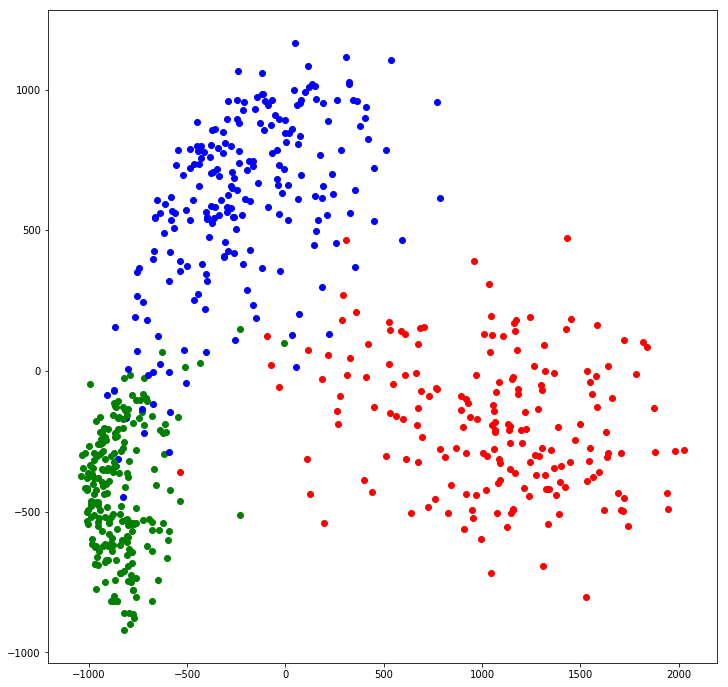

In [174]:
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, n_selected):
    plt.scatter(selected_pca1_train_images[i][0],
                selected_pca1_train_images[i][1],
                color=color_values[selected_train_labels[i]])

plt.show() 

In [175]:
clf1 = svm.SVC(kernel='linear', C=1.0)
clf1 = clf1.fit(selected_pca1_train_images, selected_train_labels)

[1 1 1 ..., 0 0 0]


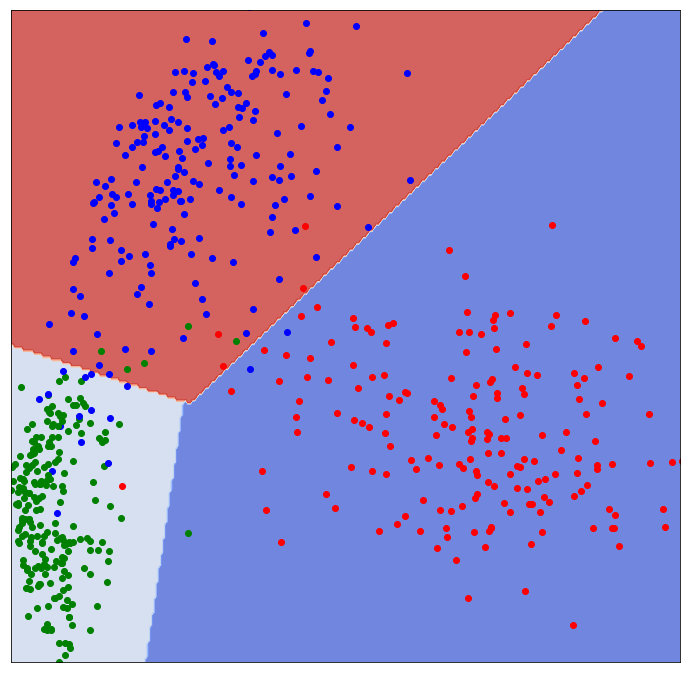

In [176]:
plot_svm(clf1, selected_pca1_train_images, selected_train_labels)

In [177]:
clf3 = svm.SVC(kernel='rbf', C=1.0, tol=0.001, gamma=0.00001, max_iter=1e9, verbose=True)
clf3.fit(selected_pca1_train_images, selected_train_labels)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=1000000000.0, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True)

[1 1 1 ..., 0 0 0]


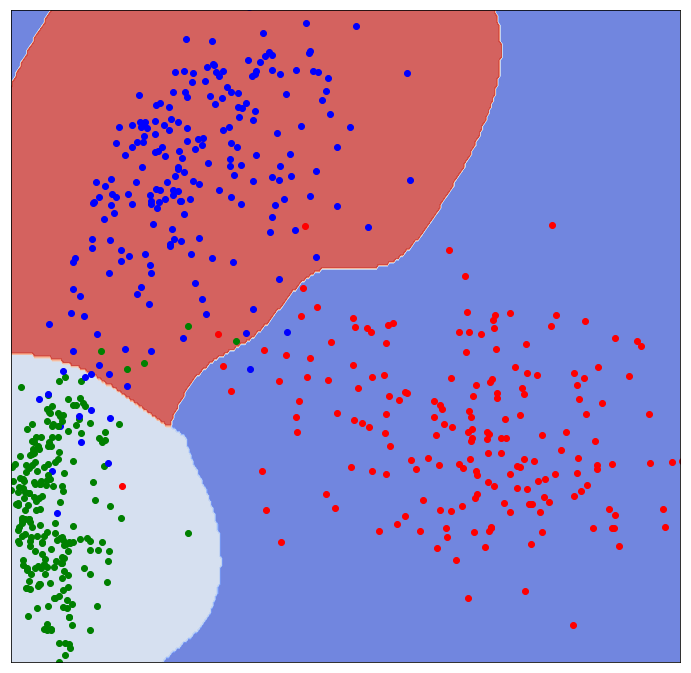

In [178]:
plot_svm(clf3, selected_pca1_train_images, selected_train_labels)

In [72]:
def get_labels_predictions_svm(clf, X, Y):
    
    labels_predictions = []
    for i in range(0, X.shape[0]):
        
        label = Y[i]
        prediction = clf.predict(X[i].reshape(1, -1))
        labels_predictions.append([label, prediction])

    return labels_predictions

In [67]:
pca2 = PCA(n_components=100)
pca2.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [68]:
pca2_train_images = pca2.transform(train_set.images)
pca2_test_images = pca2.transform(test_set.images)

In [89]:
n_selected_per_class = 600
n_selected = n_selected_per_class*10

selected_pca2_train_images = np.zeros((n_selected, 100))
selected_train_labels = []

n_currently_selected = [0]*10

k = 0
for i in range(0, pca2_train_images.shape[0]):
    if n_currently_selected[train_set.labels[i]] < n_selected_per_class:
        selected_pca2_train_images[k, :] = pca2_train_images[i]
        selected_train_labels.append(train_set.labels[i])
        n_currently_selected[train_set.labels[i]] += 1
        k += 1
        

In [92]:
clf1 = svm.SVC(kernel='linear', C=1.0, max_iter=1e8)
clf1 = clf1.fit(selected_pca2_train_images, selected_train_labels)

In [76]:
labels_predictions = get_labels_predictions_svm(clf1, pca2_test_images, test_set.labels)

In [93]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label, prediction] += 1
    return ret

In [94]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))

In [96]:
confusion_matrix = get_confusion_matrix(10, labels_predictions)

In [97]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  943.     0.     7.     1.     3.     8.    13.     1.     3.     1.]
 [    0.  1097.    10.     2.     0.     3.     3.     2.    18.     0.]
 [   17.    18.   898.    22.    21.     2.    23.    12.    15.     4.]
 [    3.     6.    37.   793.     2.   121.     4.     9.    21.    14.]
 [    1.     1.     5.     4.   867.     1.    12.     7.     3.    81.]
 [   18.    12.    12.    31.    20.   747.     8.     4.    22.    18.]
 [   10.     2.    39.     3.    16.    21.   865.     0.     2.     0.]
 [    2.    16.    34.    11.    16.     1.     0.   901.     5.    42.]
 [   13.    16.    17.    62.    18.    54.    14.    18.   728.    34.]
 [    6.     3.    11.    26.    45.    13.     0.    59.     7.   839.]]


In [98]:
error_ratio = get_error_ratio(labels_predictions)

In [99]:
print(error_ratio)

0.1322


In [151]:
clf2 = svm.SVC(kernel='rbf', C=1.0, gamma=0.0000001, max_iter=1e4)
clf2 = clf2.fit(selected_pca2_train_images, selected_train_labels)

In [152]:
labels_predictions = get_labels_predictions_svm(clf2, pca2_test_images, test_set.labels)

In [153]:
confusion_matrix = get_confusion_matrix(10, labels_predictions)

In [154]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  965.     0.     0.     0.     1.     6.     5.     1.     2.     0.]
 [    0.  1119.     2.     2.     0.     2.     4.     0.     6.     0.]
 [   11.     4.   950.     8.    15.     0.    12.    11.    20.     1.]
 [    1.     1.    18.   936.     0.    28.     2.     9.    11.     4.]
 [    1.     1.     3.     0.   933.     0.     8.     3.     2.    31.]
 [    7.     2.     2.    16.     5.   838.    11.     1.     7.     3.]
 [    8.     3.     6.     0.     8.     7.   923.     0.     3.     0.]
 [    0.    14.    27.     1.     8.     0.     0.   951.     3.    24.]
 [    5.     3.     7.    11.    10.    20.     6.     6.   899.     7.]
 [    6.     7.     2.     9.    34.     6.     0.    18.     9.   918.]]


In [155]:
error_ratio = get_error_ratio(labels_predictions)

In [156]:
print(error_ratio)

0.0568
